<a href="https://colab.research.google.com/github/Abash05/Kaggle-Team-1---Digital-Habits-and-Mental-Health/blob/Ahmad-stress/DigitalUseAndMentalHealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from google.colab import files

files.upload()

Saving Data.csv to Data (1).csv


{'Data (1).csv': b'id,age,gender,region,income_level,education_level,daily_role,device_hours_per_day,phone_unlocks,notifications_per_day,social_media_mins,study_mins,physical_activity_days,sleep_hours,sleep_quality,anxiety_score,depression_score,stress_level,happiness_score,focus_score,high_risk_flag,device_type,productivity_score,digital_dependence_score\n1,40,Female,Asia,High,High School,Part-time/Shift,3.54,45,561,98,34,7.0,9.12379996856656,3.353627229065094,9.926651431001652,5.0,6.593288791385255,8.0,23.0,0,Android,70.0,25.7\n2,27,Male,Africa,Lower-Mid,Master,Full-time Employee,5.65,100,393,174,102,2.0,8.83751689466956,2.90814688427508,4.0,4.0,4.126925580981799,8.1,35.0,0,Laptop,64.0,30.1\n3,31,Male,North America,Lower-Mid,Bachelor,Full-time Employee,8.87,181,231,595,140,1.0,6.486743490405938,2.8892134520710853,4.0,8.0,1.4291394113837326,7.6,15.0,0,Android,65.29930112427833,40.6\n4,41,Female,Middle East,Low,Master,Caregiver/Home,4.05,94,268,18,121,4.0,7.600503916041014,3.0974881324

In [39]:
# Set df to datset
df = pd.read_csv("Data.csv")

# Display basic info
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (3500, 24)


,id,age,gender,region,income_level,education_level,daily_role,device_hours_per_day,phone_unlocks,notifications_per_day,...,sleep_quality,anxiety_score,depression_score,stress_level,happiness_score,focus_score,high_risk_flag,device_type,productivity_score,digital_dependence_score
0,1,40,Female,Asia,High,High School,Part-time/Shift,3.54,45,561,...,3.353627,9.926651,5.0,6.593289,8.0,23.0,0,Android,70.000000,25.700000
1,2,27,Male,Africa,Lower-Mid,Master,Full-time Employee,5.65,100,393,...,2.908147,4.000000,4.0,4.126926,8.1,35.0,0,Laptop,64.000000,30.100000
2,3,31,Male,North America,Lower-Mid,Bachelor,Full-time Employee,8.87,181,231,...,2.889213,4.000000,8.0,1.429139,7.6,15.0,0,Android,65.299301,40.600000
3,4,41,Female,Middle East,Low,Master,Caregiver/Home,4.05,94,268,...,3.097488,7.093357,9.0,4.995512,7.8,28.0,1,Tablet,80.000000,36.684152
4,5,26,Female,Europe,Lower-Mid,Bachelor,Full-time Employee,13.07,199,91,...,2.786098,7.028125,15.0,9.448757,4.2,70.0,1,Android,65.299301,48.400000


In [10]:
# Count missing values and duplicates
missing = df.isnull().sum().sort_values(ascending=False)
dups = df.duplicated().sum()

print("Missing values per column:\n", missing)
print("\nDuplicate rows:", dups)

# Show barplot only if there are missing values
missing_nonzero = missing[missing > 0]

if len(missing_nonzero) > 0:
    plt.figure(figsize=(10, 4))
    sns.barplot(x=missing_nonzero.index, y=missing_nonzero.values, palette="crest")
    plt.title("Missing values per column (only non-zero)")
    plt.xlabel("Column")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

Missing values per column:
 id                          0
age                         0
gender                      0
region                      0
income_level                0
education_level             0
daily_role                  0
device_hours_per_day        0
phone_unlocks               0
notifications_per_day       0
social_media_mins           0
study_mins                  0
physical_activity_days      0
sleep_hours                 0
sleep_quality               0
anxiety_score               0
depression_score            0
stress_level                0
happiness_score             0
focus_score                 0
high_risk_flag              0
device_type                 0
productivity_score          0
digital_dependence_score    0
dtype: int64

Duplicate rows: 0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        3500 non-null   int64  
 1   age                       3500 non-null   int64  
 2   gender                    3500 non-null   object 
 3   region                    3500 non-null   object 
 4   income_level              3500 non-null   object 
 5   education_level           3500 non-null   object 
 6   daily_role                3500 non-null   object 
 7   device_hours_per_day      3500 non-null   float64
 8   phone_unlocks             3500 non-null   int64  
 9   notifications_per_day     3500 non-null   int64  
 10  social_media_mins         3500 non-null   int64  
 11  study_mins                3500 non-null   int64  
 12  physical_activity_days    3500 non-null   float64
 13  sleep_hours               3500 non-null   float64
 14  sleep_qu

In [12]:
df.describe()

,id,age,device_hours_per_day,phone_unlocks,notifications_per_day,social_media_mins,study_mins,physical_activity_days,sleep_hours,sleep_quality,anxiety_score,depression_score,stress_level,happiness_score,focus_score,high_risk_flag,productivity_score,digital_dependence_score
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1750.500000,28.078571,7.317677,147.107429,335.117143,159.362857,108.116571,3.350000,7.254481,2.708848,7.183858,8.830000,5.076560,6.418568,41.598600,0.201429,65.299301,36.684152
std,1010.507298,9.352385,3.239838,67.770656,239.678612,132.748048,79.796273,1.877976,1.291879,1.101105,5.043220,5.738959,3.403503,3.019828,23.764574,0.401125,9.664716,14.115504
min,1.000000,13.000000,0.280000,9.000000,22.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,33.000000,5.600000
25%,875.750000,21.000000,4.867500,96.000000,170.000000,68.000000,42.000000,2.000000,6.410545,1.919438,4.000000,4.000000,1.341488,4.000000,24.750000,0.000000,59.000000,26.200000
50%,1750.500000,27.000000,6.760000,136.000000,268.000000,119.000000,102.000000,3.000000,7.291580,2.907819,6.000000,8.000000,4.809726,7.500000,44.000000,0.000000,65.299301,35.300000
75%,2625.250000,34.000000,9.152500,187.000000,434.000000,204.000000,163.000000,5.000000,8.162298,3.276968,8.845008,13.000000,8.794302,8.900000,59.000000,0.000000,71.000000,45.100000
max,3500.000000,50.000000,17.160000,374.000000,1211.000000,631.000000,418.000000,7.000000,11.004566,5.000000,27.154217,27.000000,10.000000,10.000000,100.000000,1.000000,95.000000,89.200000


In [40]:
df = df.drop(columns = ['id', 'device_type'])
df.head()

,age,gender,region,income_level,education_level,daily_role,device_hours_per_day,phone_unlocks,notifications_per_day,social_media_mins,...,sleep_hours,sleep_quality,anxiety_score,depression_score,stress_level,happiness_score,focus_score,high_risk_flag,productivity_score,digital_dependence_score
0,40,Female,Asia,High,High School,Part-time/Shift,3.54,45,561,98,...,9.123800,3.353627,9.926651,5.0,6.593289,8.0,23.0,0,70.000000,25.700000
1,27,Male,Africa,Lower-Mid,Master,Full-time Employee,5.65,100,393,174,...,8.837517,2.908147,4.000000,4.0,4.126926,8.1,35.0,0,64.000000,30.100000
2,31,Male,North America,Lower-Mid,Bachelor,Full-time Employee,8.87,181,231,595,...,6.486743,2.889213,4.000000,8.0,1.429139,7.6,15.0,0,65.299301,40.600000
3,41,Female,Middle East,Low,Master,Caregiver/Home,4.05,94,268,18,...,7.600504,3.097488,7.093357,9.0,4.995512,7.8,28.0,1,80.000000,36.684152
4,26,Female,Europe,Lower-Mid,Bachelor,Full-time Employee,13.07,199,91,147,...,5.197962,2.786098,7.028125,15.0,9.448757,4.2,70.0,1,65.299301,48.400000


/tmp/ipython-input-3096121402.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['stress_level'], bins=20, kde=True, palette='coolwarm')


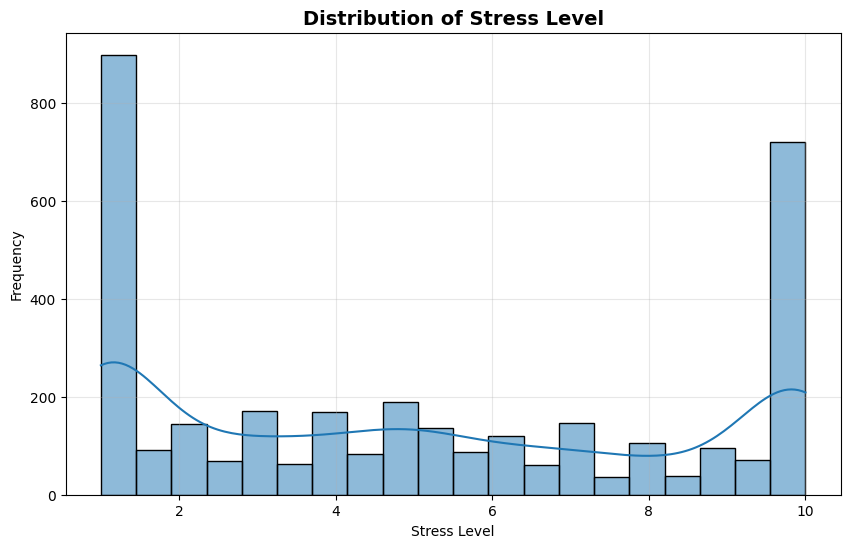

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(df['stress_level'], bins=20, kde=True, palette='coolwarm')
plt.title('Distribution of Stress Level', fontsize=14, fontweight='bold')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()

/tmp/ipython-input-1809809480.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='stress_level', data=df, palette='pastel')


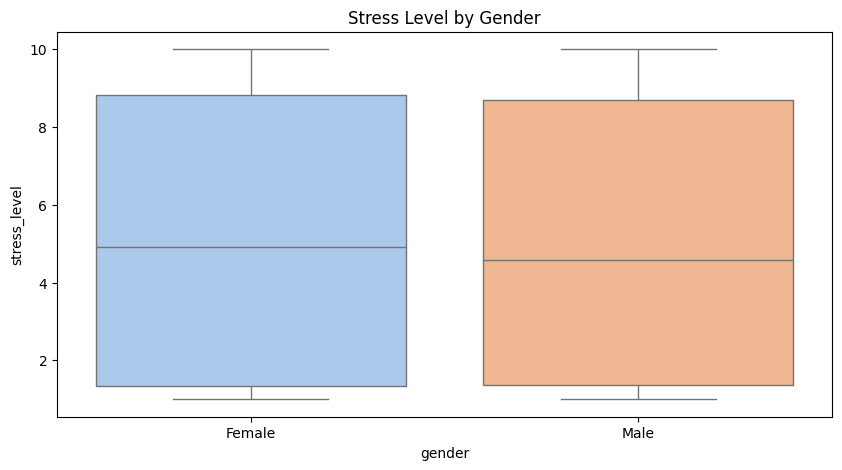

/tmp/ipython-input-1809809480.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income_level', y='stress_level', data=df, palette='cool')


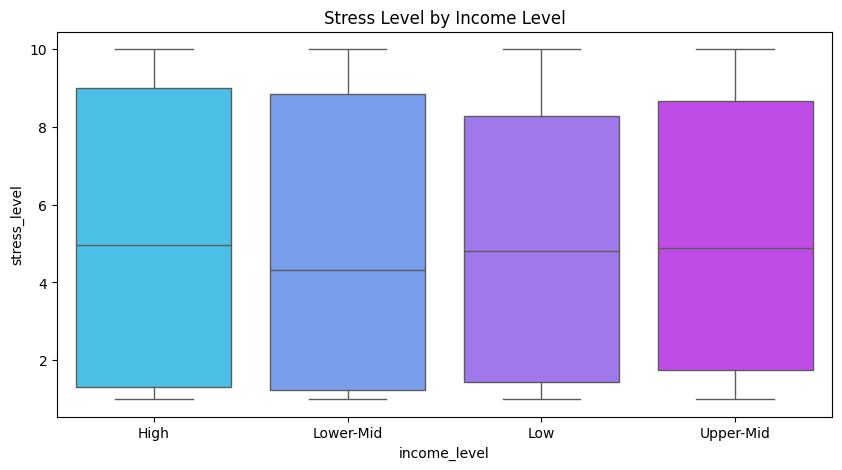

/tmp/ipython-input-1809809480.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='education_level', y='stress_level', data=df, palette='mako')


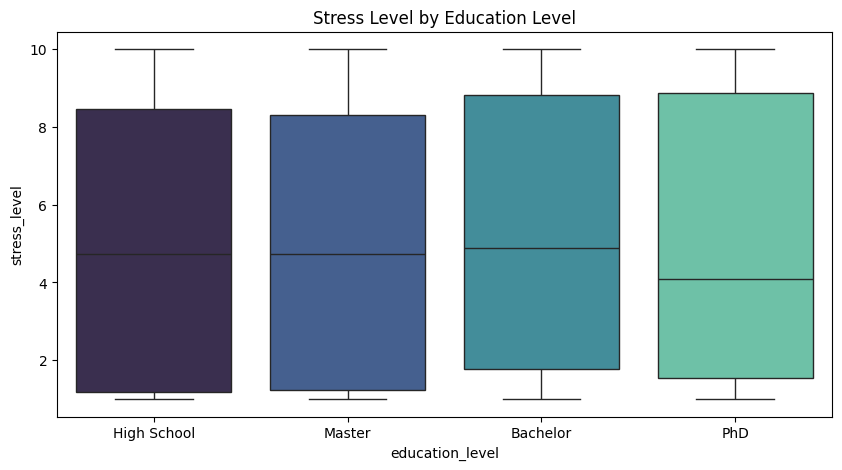

In [13]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='gender', y='stress_level', data=df, palette='pastel')
plt.title("Stress Level by Gender")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='income_level', y='stress_level', data=df, palette='cool')
plt.title("Stress Level by Income Level")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='education_level', y='stress_level', data=df, palette='mako')
plt.title("Stress Level by Education Level")
plt.show()

In [21]:
numeric_df = df.select_dtypes(include=['number'])
categorical_df = df.select_dtypes(include=['object'])

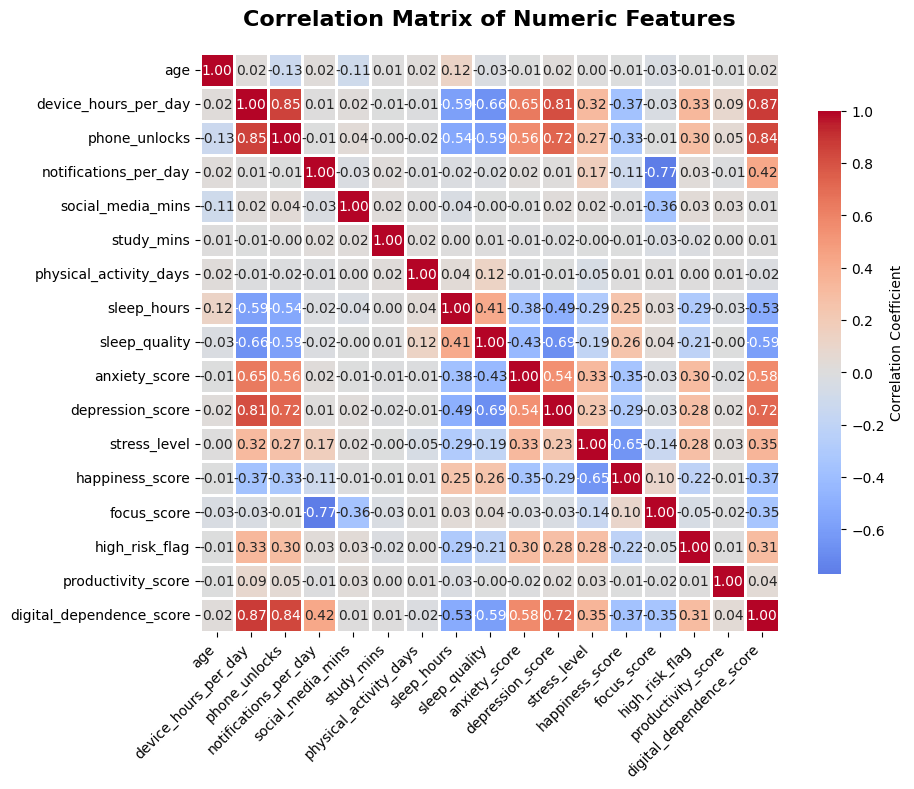

In [22]:
corr = numeric_df.corr()
plt.figure(figsize=(10, 8))
plt.title("Correlation Matrix of Numeric Features", fontsize=16, fontweight='bold', pad=20)
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}
)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

In [23]:
#numeric_df = numeric_df.drop(columns=["high_risk_flag"])

/tmp/ipython-input-2842403586.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


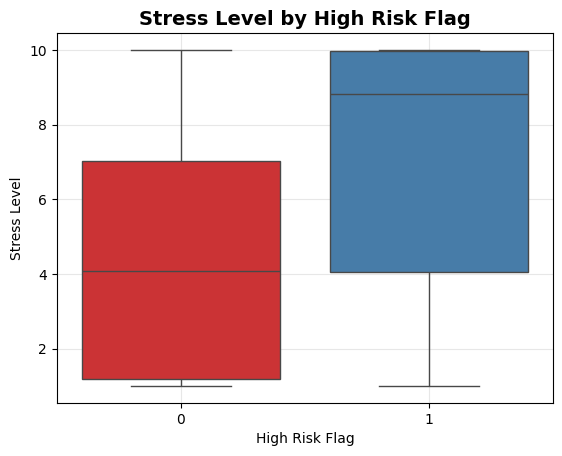

In [35]:
sns.boxplot(
    data=df,
    x='high_risk_flag',
    y='stress_level',
    palette="Set1",
    showfliers=False
)
plt.title("Stress Level by High Risk Flag", fontsize=14, fontweight="bold")
plt.xlabel("High Risk Flag")
plt.ylabel("Stress Level")
plt.grid(alpha=0.3)
plt.show()



/tmp/ipython-input-664632214.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-664632214.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-664632214.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-664632214.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-664632214.py:9: FutureWarning: 

Passing `palette

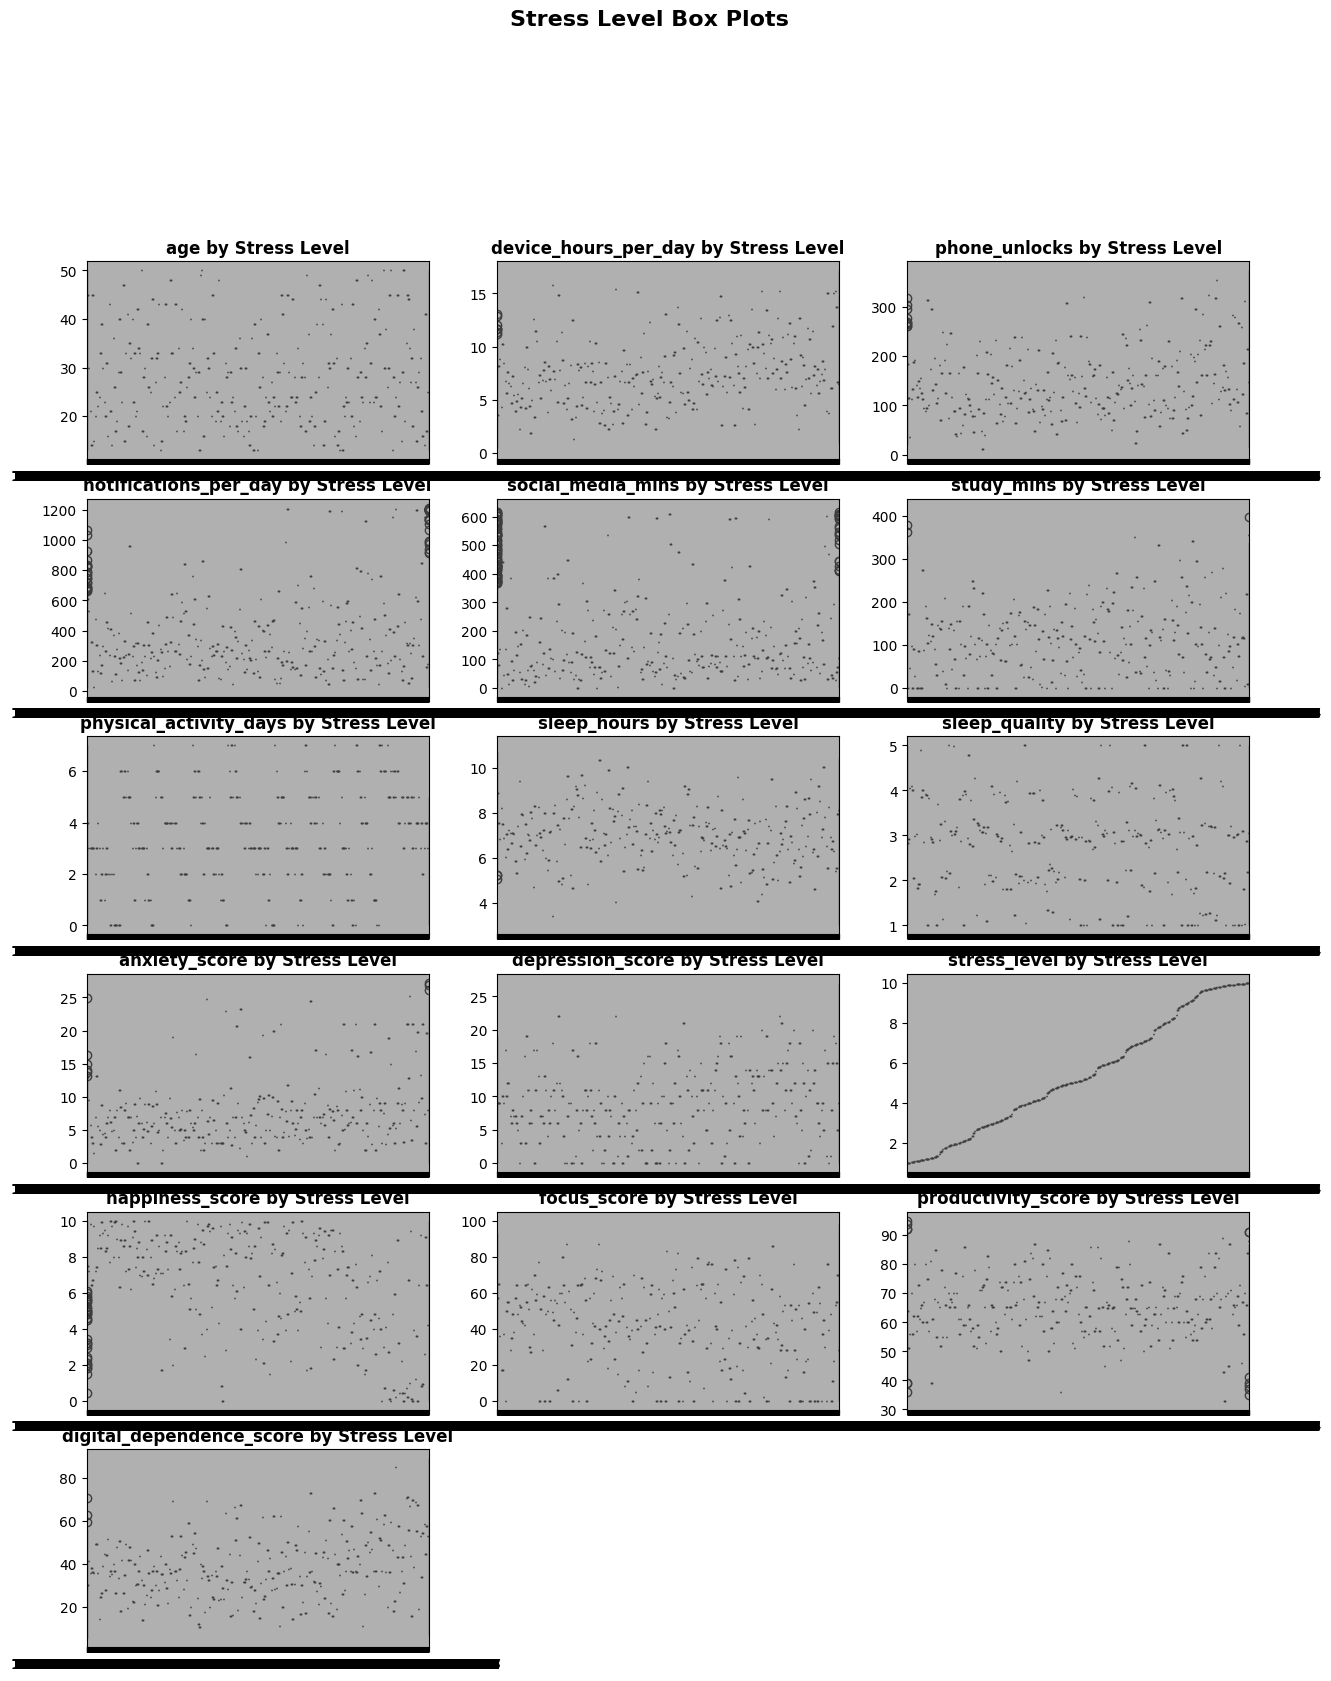

In [33]:
num_cols = numeric_df.columns
n = len(num_cols)

rows = math.ceil(n / 3)
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 3))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(
        data=df,
        x='stress_level',
        y=col,
        palette="Set1",
        ax=axes[i]
    )
    axes[i].set_title(f"{col} by Stress Level", fontsize=12, fontweight="bold")
    axes[i].grid(alpha=0.4)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Stress Level Box Plots", fontsize=16, fontweight="bold", y=1.02)
plt.show()

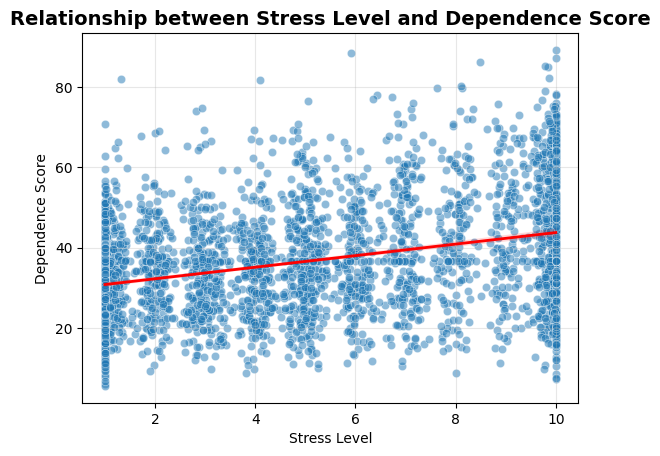

In [42]:
sns.scatterplot(
    data=df,
    x='stress_level',
    y='digital_dependence_score',
    alpha=0.5
)
sns.regplot(
    data=df,
    x='stress_level',
    y='digital_dependence_score',
    scatter=False,
    color='red',
    line_kws={"lw": 2}
)
plt.title("Relationship between Stress Level and Dependence Score", fontsize=14, fontweight="bold")
plt.xlabel("Stress Level")
plt.ylabel("Dependence Score")
plt.grid(alpha=0.3)
plt.show()

In [52]:
bins = [df['stress_level'].min() - 0.01, 3.33, 6.66, df['stress_level'].max() + 0.01]
labels = ['Low', 'Medium', 'High']
df['stress_level_category'] = pd.cut(df['stress_level'], bins=bins, labels=labels, include_lowest=True)

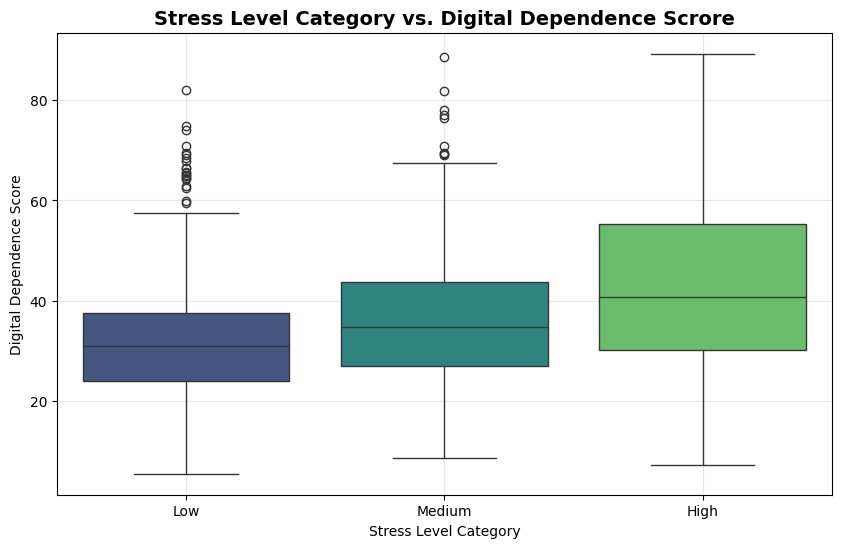

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='stress_level_category', y='digital_dependence_score', data=df, palette='viridis', hue='stress_level_category', legend=False)
plt.title('Stress Level Category vs. Digital Dependence Scrore', fontsize=14, fontweight='bold')
plt.xlabel('Stress Level Category')
plt.ylabel('Digital Dependence Score')
plt.grid(alpha=0.3)
plt.show()

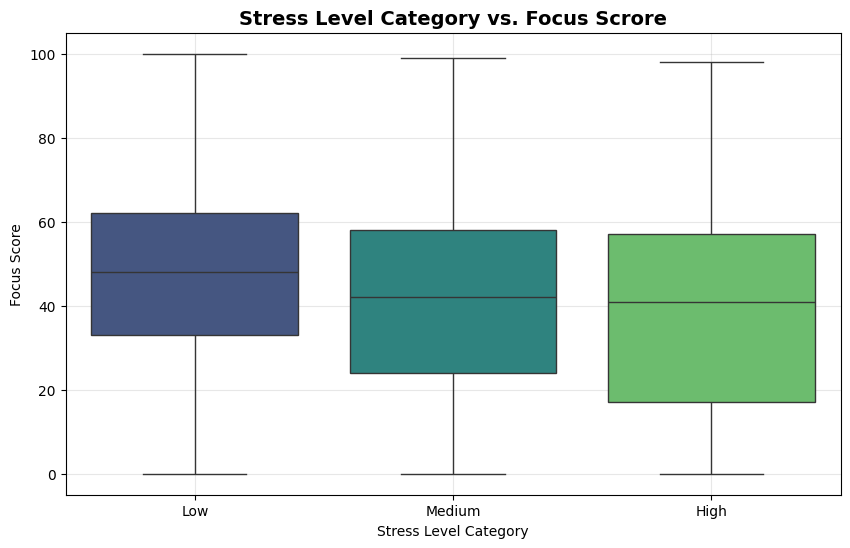

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='stress_level_category', y='focus_score', data=df, palette='viridis', hue='stress_level_category', legend=False)
plt.title('Stress Level Category vs. Focus Scrore', fontsize=14, fontweight='bold')
plt.xlabel('Stress Level Category')
plt.ylabel('Focus Score')
plt.grid(alpha=0.3)
plt.show()

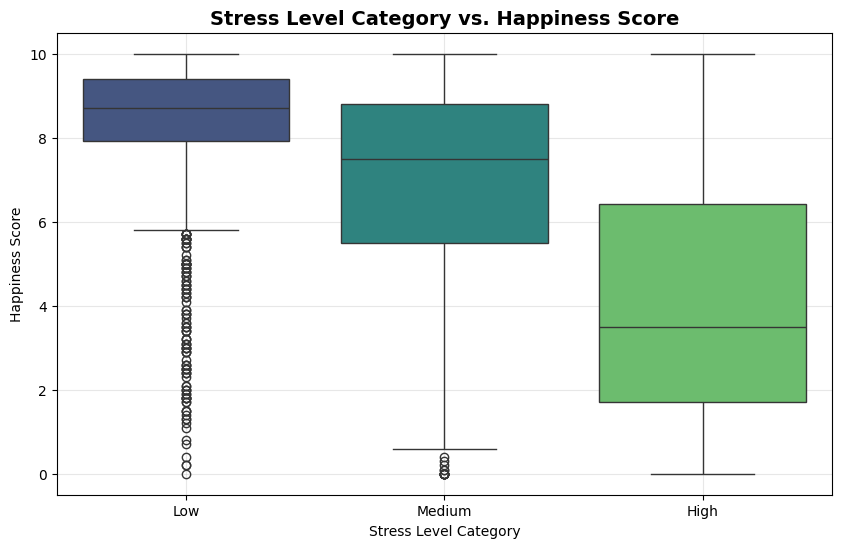

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='stress_level_category', y='happiness_score', data=df, palette='viridis', hue='stress_level_category', legend=False)
plt.title('Stress Level Category vs. Happiness Score', fontsize=14, fontweight='bold')
plt.xlabel('Stress Level Category')
plt.ylabel('Happiness Score')
plt.grid(alpha=0.3)
plt.show()

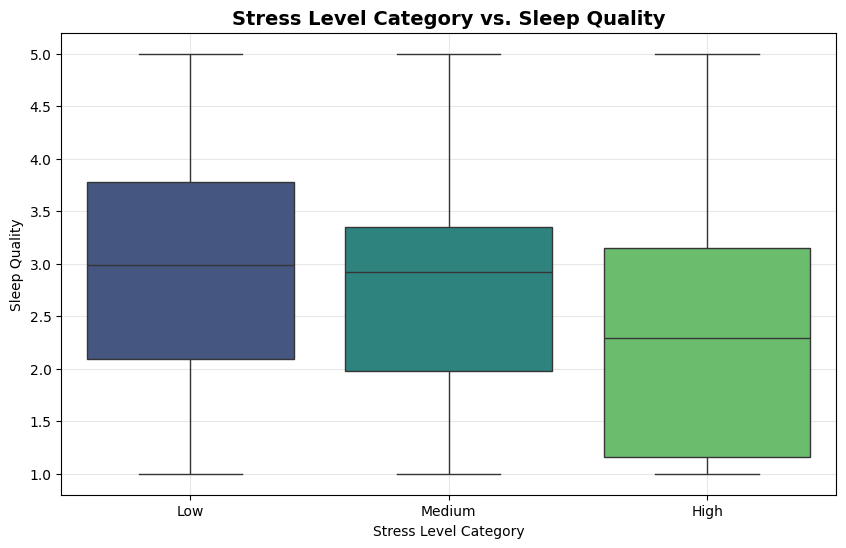

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='stress_level_category', y='sleep_quality', data=df, palette='viridis', hue='stress_level_category', legend=False)
plt.title('Stress Level Category vs. Sleep Quality', fontsize=14, fontweight='bold')
plt.xlabel('Stress Level Category')
plt.ylabel('Sleep Quality')
plt.grid(alpha=0.3)
plt.show()